# Laboratório 3

## Bacteria

Nesse laboratório, queremos controlar o crescimento de uma população de bactérias através do uso de um químico, que tem efeitos positivos e negativos, como descrito abaixo na equação doferencial. Nesse meio, queremos maximizar a quantidade de bactérias no tempo final, com a menor quantidade de químico possível. Consideramos o intervalo de tempo $[0,1]$

<center>
    
## O problema

</center>
    
$$\begin{equation}
\max_u Cx(1) - \int_0^1 u(t)^2 dt \\
s.a. x'(t) = rx(t) + Au(t)x(t) - Bu(t)^2e^{-x(t)} \\
x(t_0) = x_0, A,B,C \geq 0 
\end{equation}$$


Suponha a existência de $u^*$ e o estado associado $x^*$. Pelo princípio de Pontryagin, existe $\lambda(t)$ diferenciável por partes, tal que:



$$\begin{equation}
H(t,x,u,\lambda) := - u(t)^2 + \lambda(t)[rx(t) + Au(t) - Bu(t)^2x^{-x(t)}] \\
\frac{\partial H}{\partial u} = -2u(t) + A\lambda(t)x(t) - 2\lambda(t)Bu(t)e^{-x(t)} = 0 \to u^{*}(t) = \frac{A\lambda x}{2(1 + B\lambda e^{-x})} \\
\frac{\partial H}{\partial x} = r\lambda + Au\lambda + \lambda Bu^2e^{-x} = -\lambda '(t) \\
\lambda(t_1) = C, x(t_0) = x_0
\end{equation}$$ 

Note que $\lambda(t)$ é uma função exponencial positiva, pois tem um valor positivo. 

</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class bacteria():

    def __init__(self,A,B,C,r,x0):
        self.A = A
        self.B = B
        self.C = C
        self.r = r
        self.x0 = x0
        
    def u(self,t,x,adj):
        return (self.A*adj*x)/(2*(1 + self.B*adj*np.exp(-x)))
        
    def dx(self,t,adj,x):
        return self.r*x + A*self.u(t,x,adj)*x - B*self.u(t,x,adj)**2*np.exp(-x)
    
    def dadj(self,t,adj,x):
        return -self.r*adj - self.A*self.u(t,x,adj)*adj - self.B*adj*self.u(t,x,adj)**2*np.exp(-x)
    
    def runge_kutta_state(self,t,adj,x,N,h):

        for k in range(N):
            k1 = self.dx(t[k],adj[k],x[k])
            k2 = self.dx(t[k]+h/2,adj[k],x[k] + h*k1/2)
            k3 = self.dx(t[k]+h/2,adj[k],x[k]+h*k2/2)
            k4 = self.dx(t[k] + h, adj[k],x[k] + h*k3)
            x[k+1] = x[k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        return x

    def runge_kutta_adj(self,t,adj,x,N,h):
    
        for k in range(N,0,-1):
            k1 = self.dadj(t[k],adj[k],x[k])
            k2 = self.dadj(t[k] - h/2,adj[k] + h*k1/2,x[k])
            k3 = self.dadj(t[k] - h/2,adj[k]+h*k2/2,x[k])
            k4 = self.dadj(t[k] - h, adj[k] + h*k3,x[k])
            adj[k-1] = adj[k] - (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        return adj
    
    def solve(self):
        #parameters
        N = 100
        h = 1/N
        delta = 0.1
        test = -1
        t = np.linspace(0,1,N + 1)
        
        #variables
        x = np.zeros(N + 1)
        adj = np.zeros(N + 1)
        u = np.zeros(N + 1)
        x[0] = self.x0
        adj[-1] = self.C

        while test < 0:
        
            old_u = u.copy()
            old_x = x.copy()
            old_adj = adj.copy()
        
            x = self.runge_kutta_state(t,old_adj,old_x,N,h)

            adj = self.runge_kutta_adj(t,old_adj,x,N,h)

            u = 0.5*(self.u(0,adj,x) + old_u)

            temp1 = delta*sum(abs(u)) - sum(abs(old_u - u))
            temp2 = delta*sum(abs(x)) - sum(abs(old_x - x))
            temp3 = delta*sum(abs(adj)) - sum(abs(old_adj - adj))
            test = min(temp1,temp2,temp3)
        
        return t,x,u,adj

In [20]:
def plotting(t,x):
    """ x is a dictionary with the name and a list with lists of the informations to plot"""
    fig = plt.figure(figsize=(12,10))
    for i in range(len(x.keys())):
        plt.subplot(3,1,i+1)
        k = 0
        for j in x[list(x.keys())[i]]:
            k += 1
            plt.plot(t,j, label = str(k))
        plt.title(list(x.keys())[i])
        plt.legend()

### Parâmetros para os testes e modelagem

In [21]:
A,B,C,r,x0 = 1,12,1,1,1

problem = bacteria(A,B,C,r,x0)

t,x,u,adj = problem.solve()

problem2 = bacteria(8,10,0.1,1,1)

t2,x2,u2,adj2 = problem2.solve()

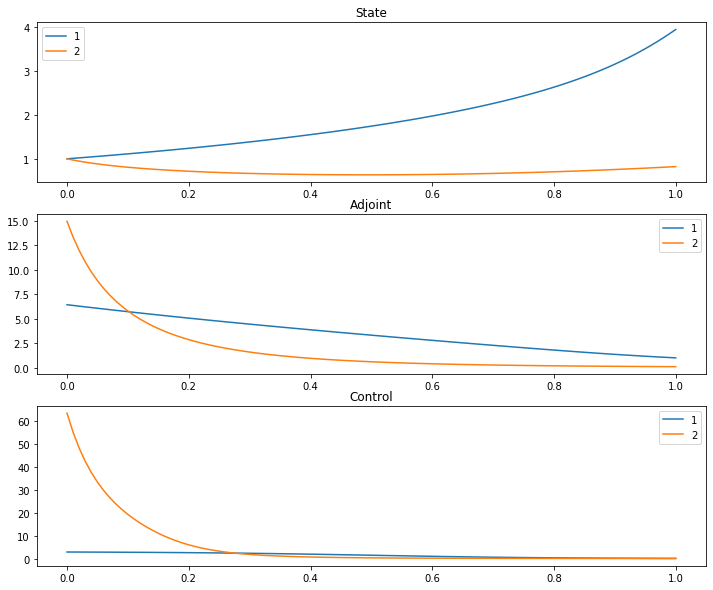

In [22]:
plotting(t,{'State':[x,x2], 'Adjoint': [adj,adj2], 'Control': [u,u2]})